## 1.4.12 Template Matching

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [17]:
img = cv2.imread('messi5.jpg',0)
img2 = img.copy()
template = cv2.imread('template.jpg',0)
w, h = template.shape[::-1]

In [18]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [19]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)

In [20]:
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [21]:
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

In [22]:
    cv2.rectangle(img,top_left, bottom_right, 255, 2)

array([[191, 196, 193, ..., 184, 185, 188],
       [ 62,  57,  59, ...,  66,  71,  66],
       [ 54,  56,  57, ...,  50,  57,  48],
       ...,
       [107, 112, 113, ..., 112, 114, 107],
       [ 96, 100, 102, ..., 106, 102,  90],
       [107, 107, 106, ..., 111, 108, 100]], dtype=uint8)

Text(0.5, 0.98, 'cv2.TM_SQDIFF_NORMED')

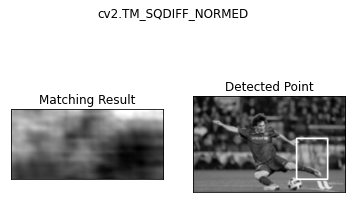

In [23]:
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

In [24]:
    plt.show()

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [26]:
img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.png',0)
w, h = template.shape[::-1]

In [27]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8

In [29]:
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

In [30]:
cv2.imwrite('res.png',img_rgb)

True